The data consists of 22 columns which are:

* `id` - ID
* `battery_power` - Total energy a battery can store in one time measured in mAh
* `blue` - Has Bluetooth or not
* `clock_speed` - The speed at which the microprocessor executes instructions
* `dual_sim` - Has dual sim support or not
* `fc` - Front Camera megapixels
* `four_g` - Has 4G or not
* `int_memory` - Internal Memory in Gigabytes
* `m_dep` - Mobile Depth in cm
* `mobile_wt` - Weight of mobile phone
* `n_cores` - Number of cores of the processor
* `pc` - Primary Camera megapixels
* `px_height` - Pixel Resolution Height
* `px_width` - Pixel Resolution Width
* `ram` - Random Access Memory in Megabytes
* `sc_h` - Screen Height of mobile in cm
* `sc_w` - Screen Width of mobile in cm
* `talk_time` - longest time that a single battery charge will last when you are
* `three_g` - Has 3G or not
* `touch_screen` - Has touch screen or not
* `wifi` - Has wifi or not
* `price_range` - This is the target variable with the value of:
    * 0 (low cost)

    * 1 (medium cost)
    * 2 (high cost)
    * 3 (very high cost)

In [5]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd 
import numpy as np 
import pickle
import os
np.random.seed(21)

In [6]:
root_path = "E:\\Tasks\\MaidsCC\\Devices Price Classification System using Python and Spring Boot"
data_path = os.path.join(root_path, "Data")
results_path = os.path.join(root_path, "Results")

In [7]:
train_data = pd.read_csv(os.path.join(data_path, "train.csv"))
test_data = pd.read_csv(os.path.join(data_path, "test.csv"))

In [8]:
train_data.shape , test_data.shape

((2000, 21), (1000, 21))

## Exploratory Data Analysis (EDA): 

After reviewing the description of the features, I found that most of features contribute to determining the price of the device, but to different degrees where:
* Battery Power: Devices with higher battery power are generally priced higher due to longer usage times and better performance.
* Clock Speed: Higher clock speeds usually indicate better performance and processing power, which can contribute to higher prices.
* Internal Memory: More internal memory allows for better storage capacity, influencing the price positively.
* RAM: Higher RAM enhances multitasking and overall speed, leading to higher-priced models.
* Primary Camera (pc) and Front Camera (fc): Better camera quality (higher megapixels) often leads to higher prices as it is a desirable feature for many users.
* Pixel Resolution (px_height and px_width): Higher resolution screens provide better display quality, contributing to the price.
* Number of Cores (n_cores): More cores generally mean better performance, which can increase the price.
* 4G and 3G Capability: Phones with 4G capabilities are typically more expensive than those with only 3G.
* Touch Screen and WiFi: These features are standard in modern devices, but their presence is essential and expected for higher-priced models.
* Dimensions (m_dep, sc_h, sc_w): Slimmer and well-dimensioned devices are often priced higher due to better design and ergonomics.
* Weight (mobile_wt): The weight can impact the feel of the device; however, extremely lightweight or very heavy phones might be priced differently based on user preferences and material costs.
* Dual SIM Capability: Dual SIM devices are often priced higher as they offer additional functionality.

but we cannot quickly determine the deletion without looking at the numerical values that show the extent to which each feature is related to the target (the price of the device) as well. 

There are some features that can be linked to each other instead of letting the model to do the task of linking them. Examples of this are px_height and px_width as well as sc_h and sc_w.

In [9]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [10]:
train_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0
1999,510,1,2.0,1,5.0,1.0,45.0,0.9,168.0,6.0,...,483.0,754.0,3919.0,19.0,4.0,2,1,1,1,3


In [11]:
train_data.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
541,793,0,1.2,1,1.0,1.0,38.0,0.6,176.0,4.0,...,1226.0,1815.0,3139.0,6.0,1.0,12,1,1,1,3
1211,713,1,1.6,0,7.0,1.0,2.0,0.4,181.0,8.0,...,1211.0,1378.0,485.0,10.0,6.0,4,1,1,1,0
1862,1043,0,2.7,0,3.0,0.0,29.0,0.2,83.0,8.0,...,887.0,893.0,1183.0,5.0,3.0,8,1,0,0,0
1094,688,1,1.5,0,0.0,0.0,2.0,1.0,89.0,3.0,...,271.0,869.0,391.0,5.0,2.0,8,1,1,1,0
465,1583,1,1.6,0,5.0,1.0,42.0,0.8,118.0,3.0,...,275.0,862.0,3652.0,14.0,10.0,9,1,0,0,3


In [12]:
''' Display a concise summary of the train dataset 'the index dtype, column dtypes, non-null values, and memory usage'. '''
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
''' Calculate and display the number of missing values (null) in each column of the train_data '''
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

All column values are numeric, but some raws contain missing values (null, nan). However, since the percentage of these raws is very small, I will just delete them, knowing that in other cases we can resort to other methods, such as:
* Replace missing values with the mean or median of the column.
* Replace missing values with the mode (most frequent value) of the column, useful for categorical data.
* Replace missing values with a constant value, such as 0 or "unknown".
* Use the KNN algorithm to impute missing values based on the values of the nearest neighbors.
* Iteratively imputes missing values by modeling each feature with missing values as a function of other features.
* Use machine learning models to predict and impute missing values. Train a model on non-missing data to predict missing values.

To address missing values in the test data, I will save a vector of average values for each column to use for the test data

In [14]:
'''
    Generate descriptive statistics for the numeric columns in the train dataset.
    This includes measures such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.
'''
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000




The ranges of the values of the features in the dataset are indeed different, and it is important to address these differences before applying machine learning algorithms.

The differences in the ranges indicate that some features have significantly larger scales compared to others. For instance, ram ranges from 392 to 3993, while blue and other binary features only range from 0 to 1.
To handle these differences, I typically need to normalize or standardize the data before applying machine learning algorithms. Here are common techniques:

* Min-Max Normalization: Scales the data to a fixed range, usually [0, 1] or [-1, 1].
* Standardization (Z-score Normalization): Transforms the data to have a mean of 0 and a standard deviation of 1.
* Robust Scaler: Scales the data according to the interquartile range, making it robust to outliers.

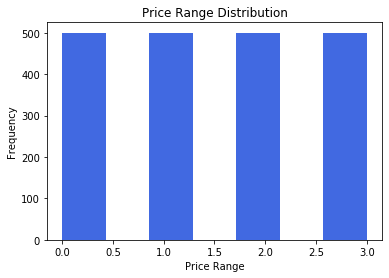

In [15]:
plt.hist(train_data["price_range"], bins=7, color='royalblue', alpha=1.0)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()

`The classes are perfectly balanced`

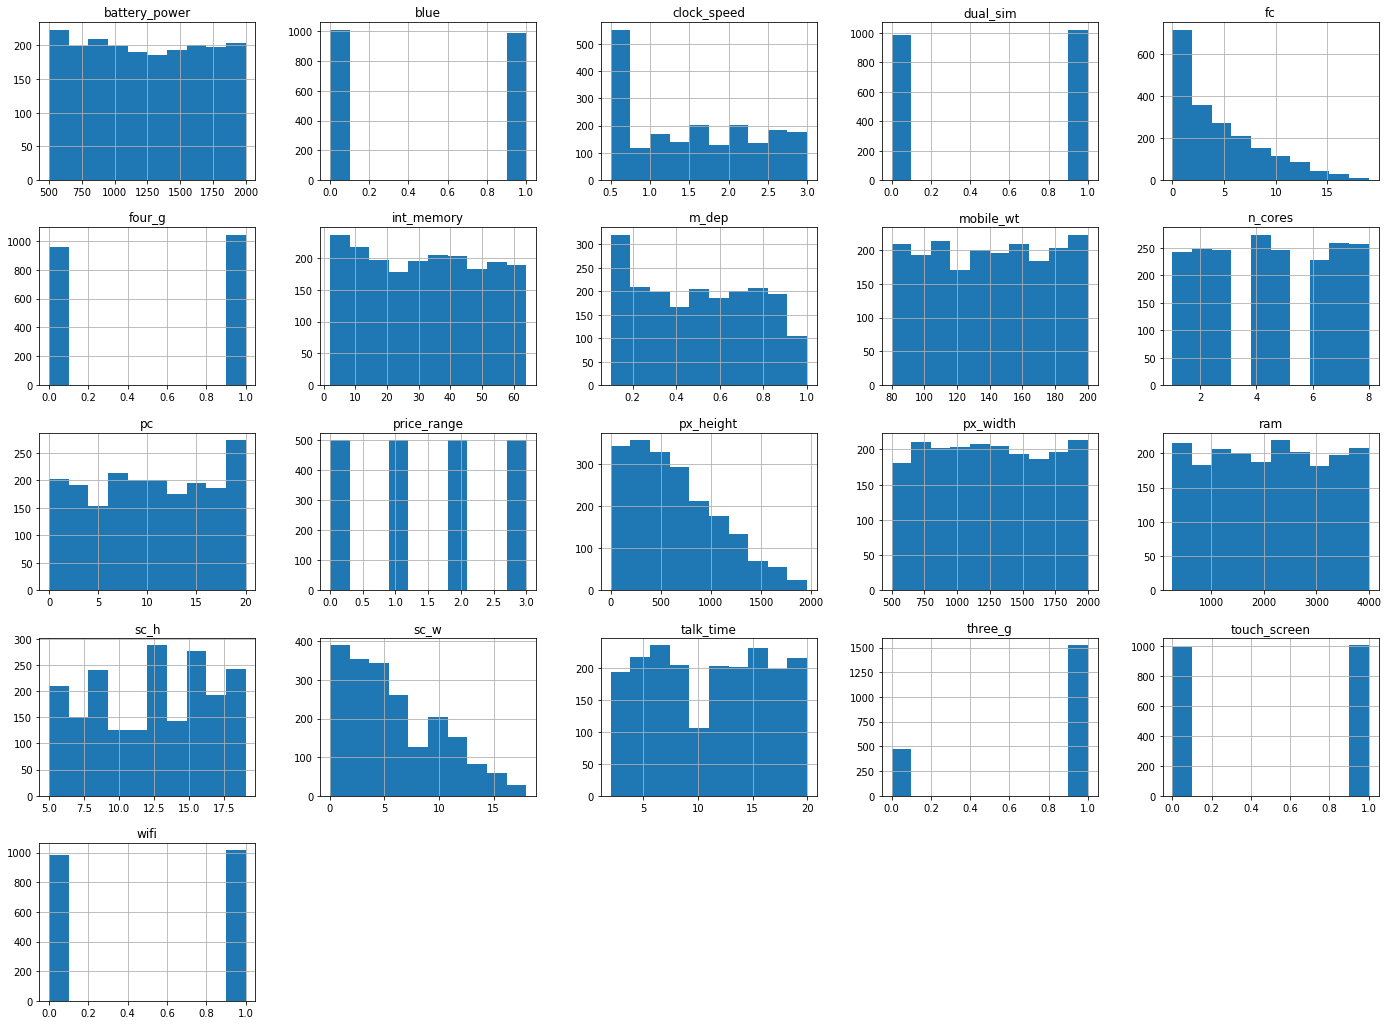

In [16]:
'''
    Generate histograms for each numeric column in the train dataset.
    The 'figsize' parameter specifies the size of the entire figure in inches (width, height).
'''
ax_array = train_data.hist(figsize=(24, 18))
# Display the generated histograms.
plt.show()


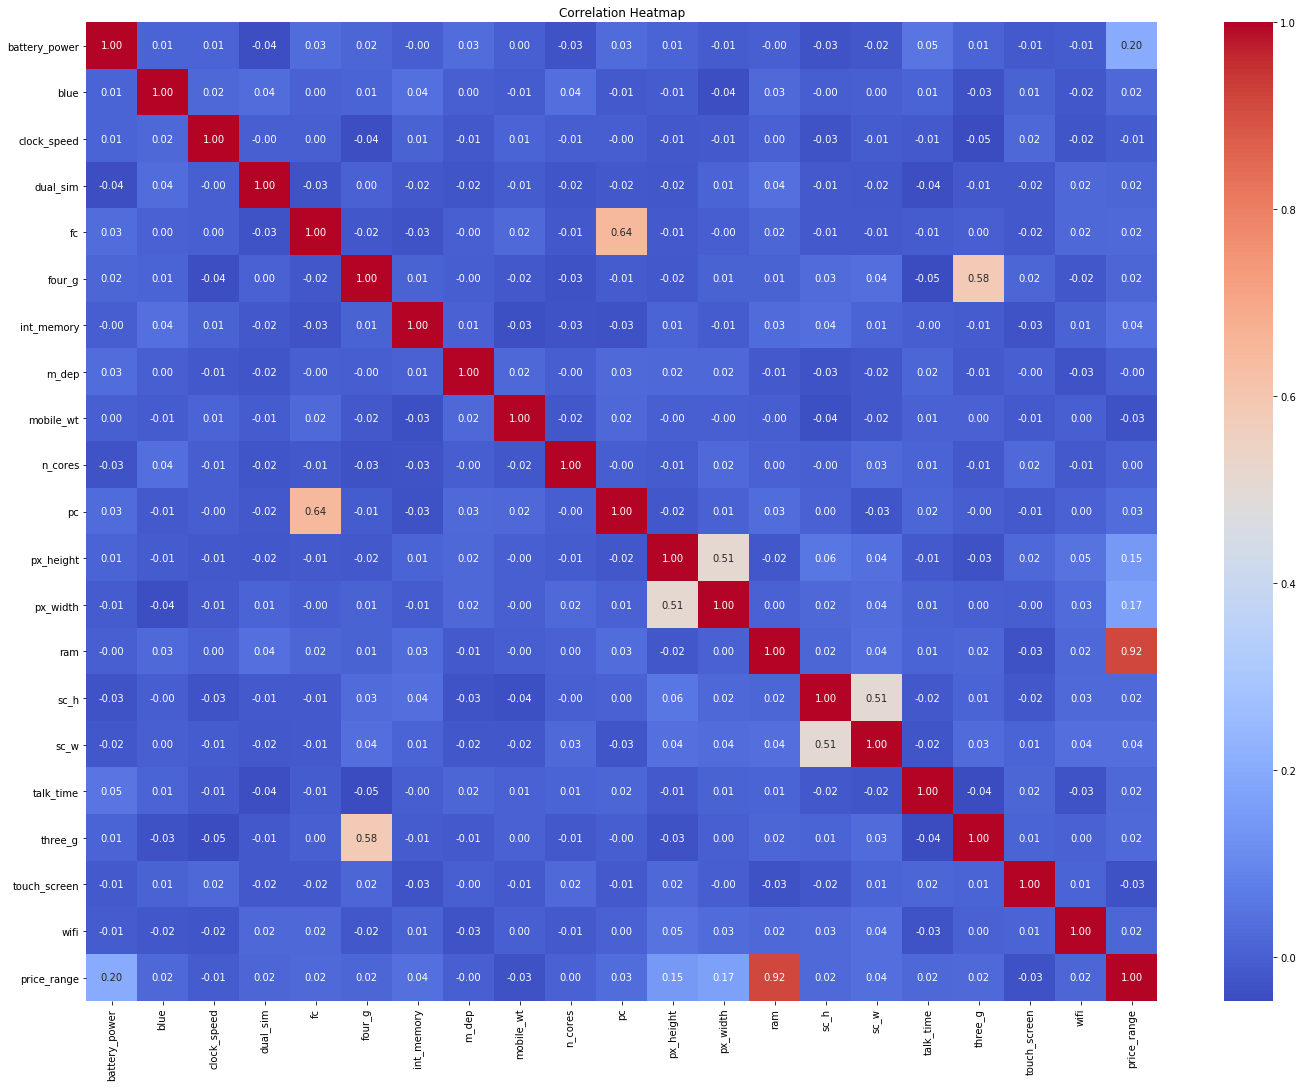

In [17]:
correlations = train_data.corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

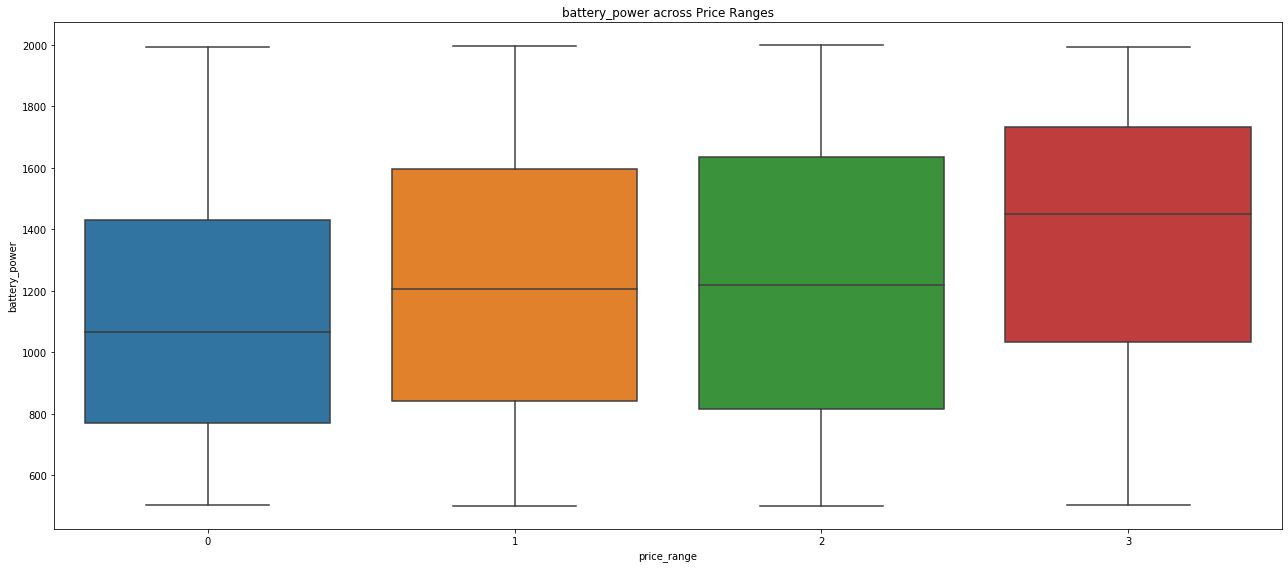

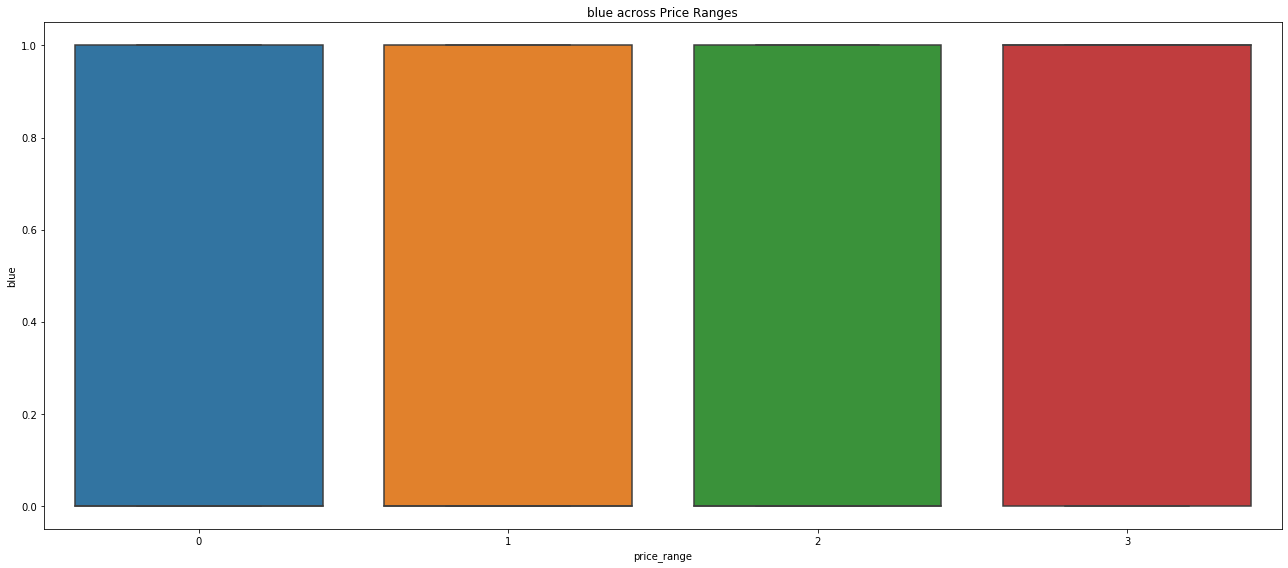

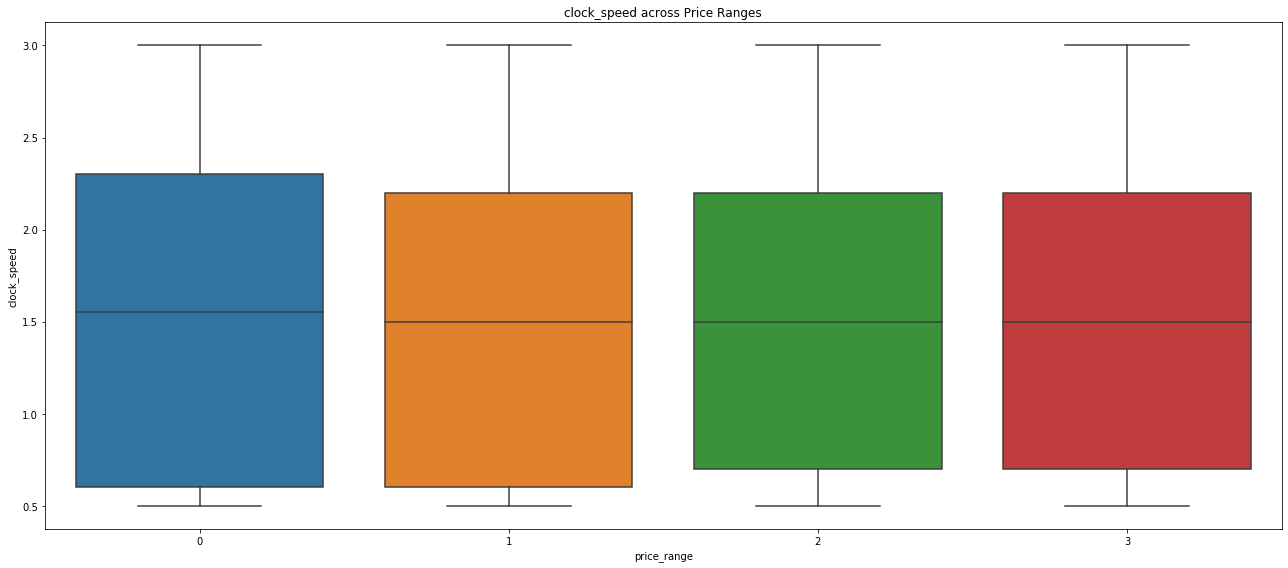

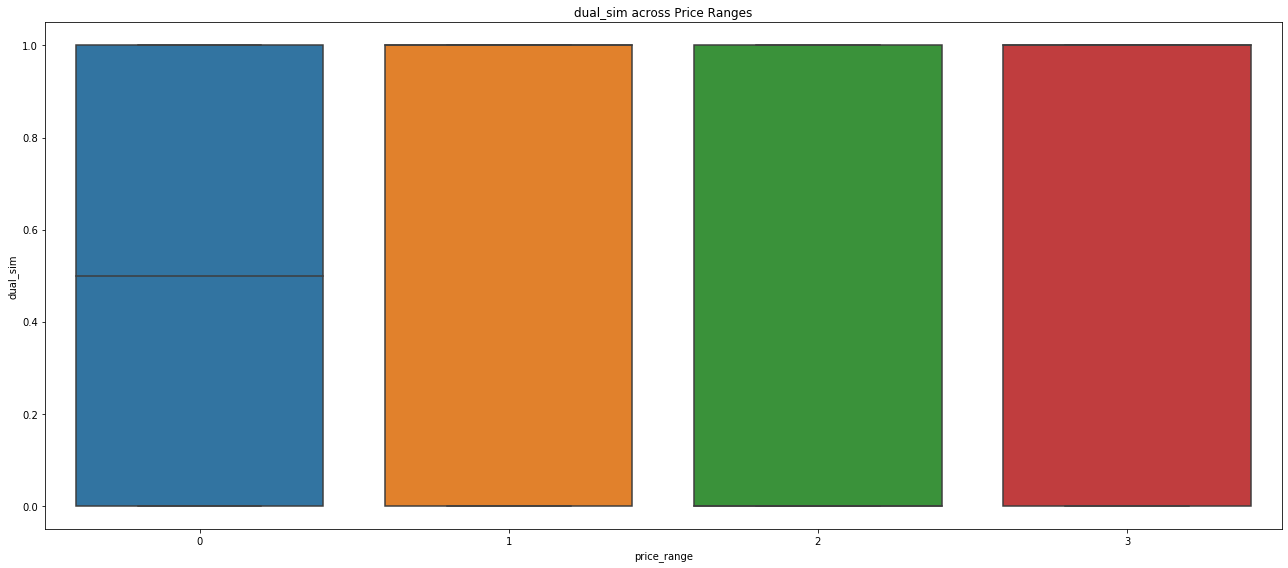

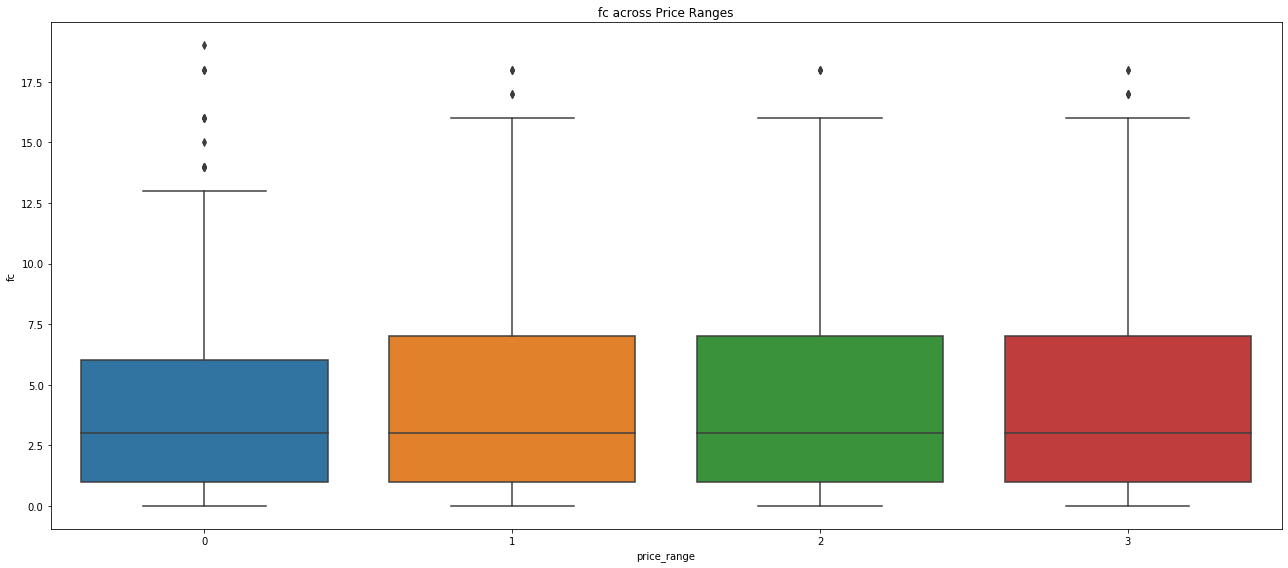

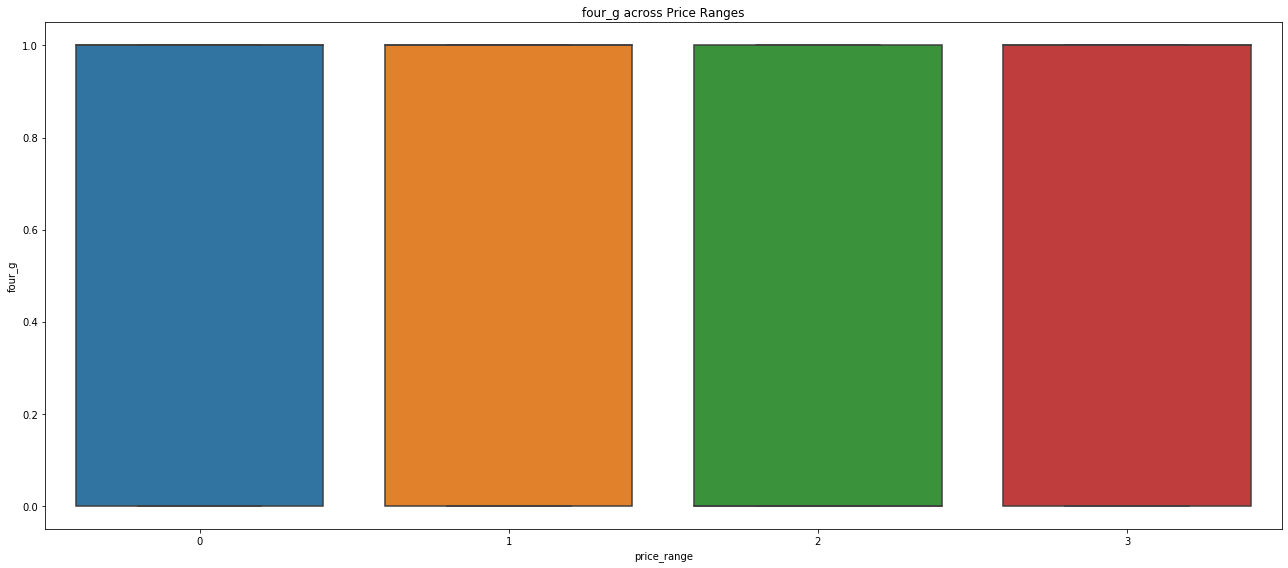

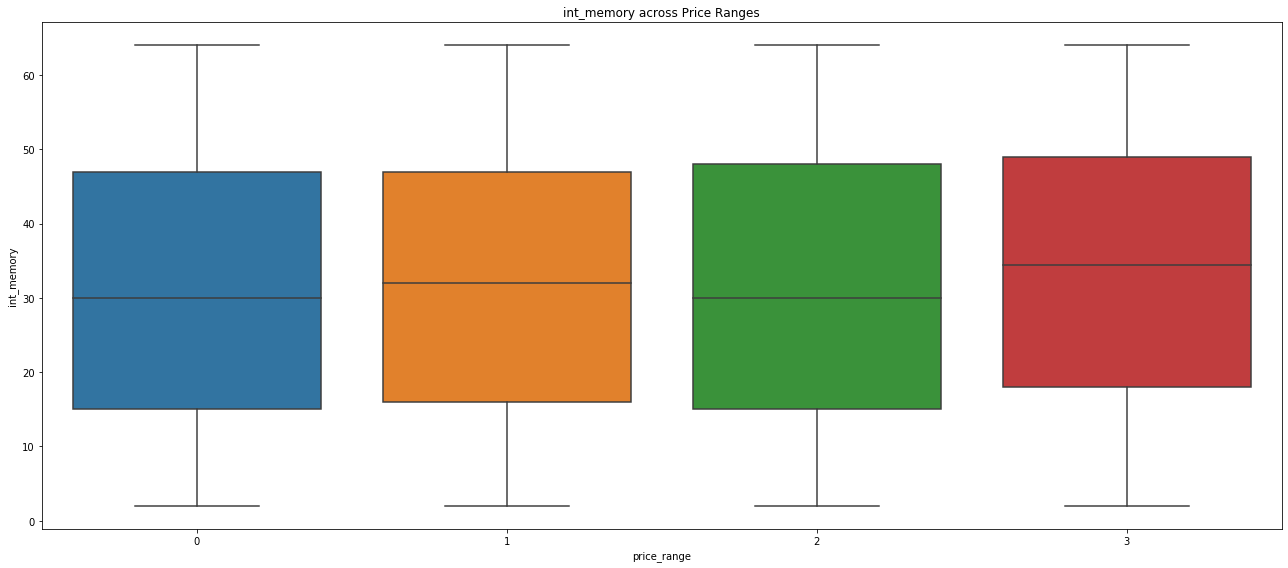

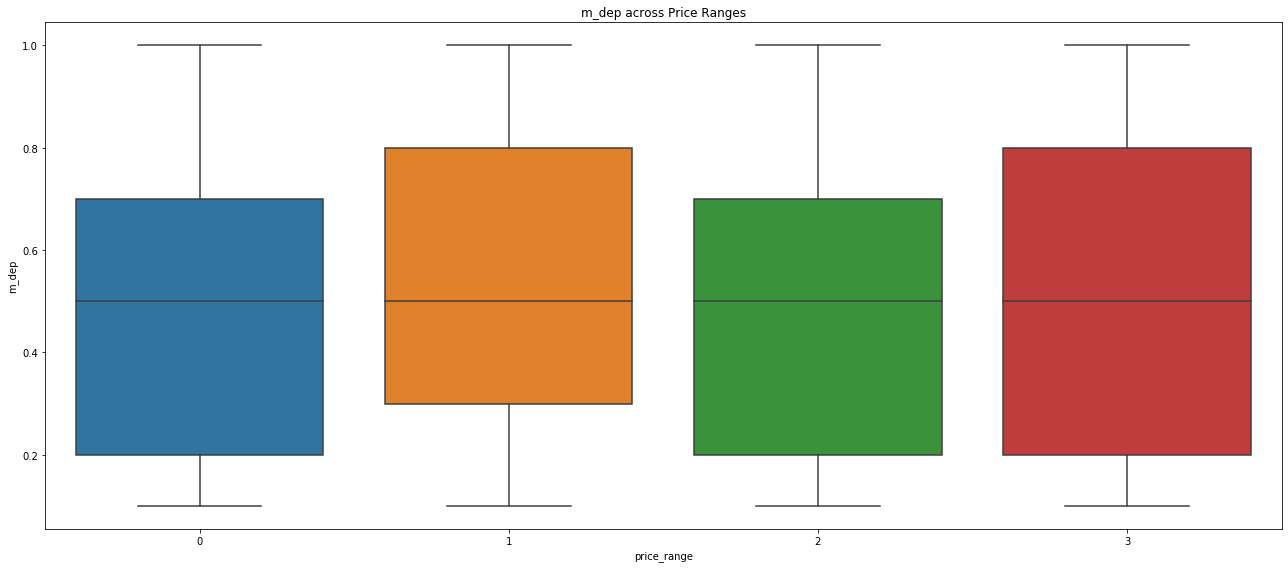

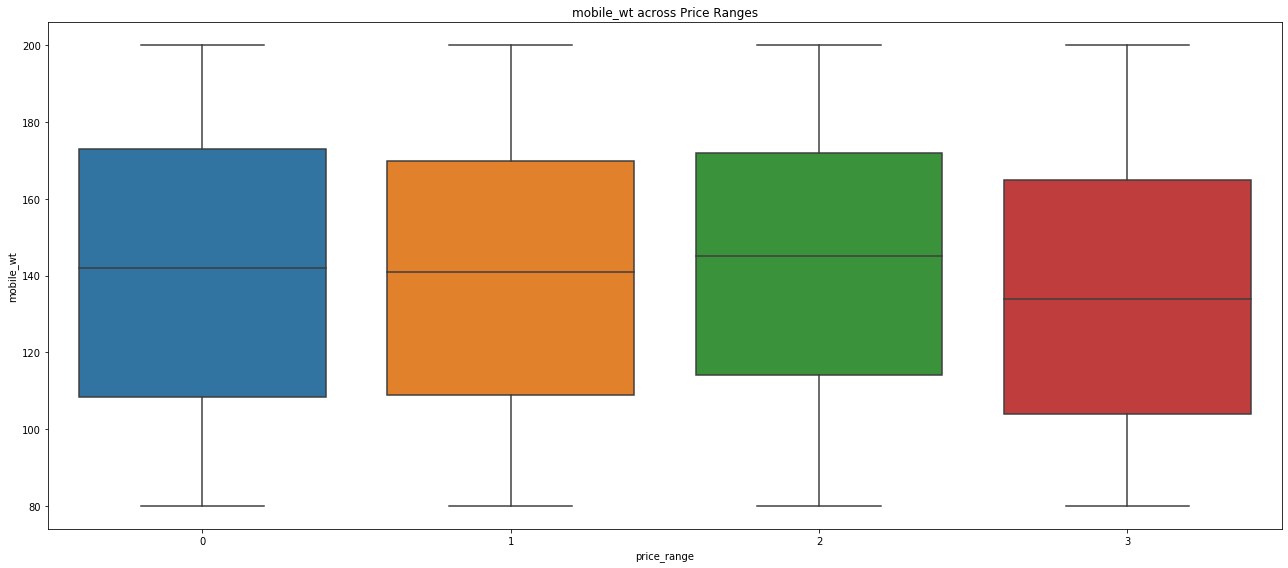

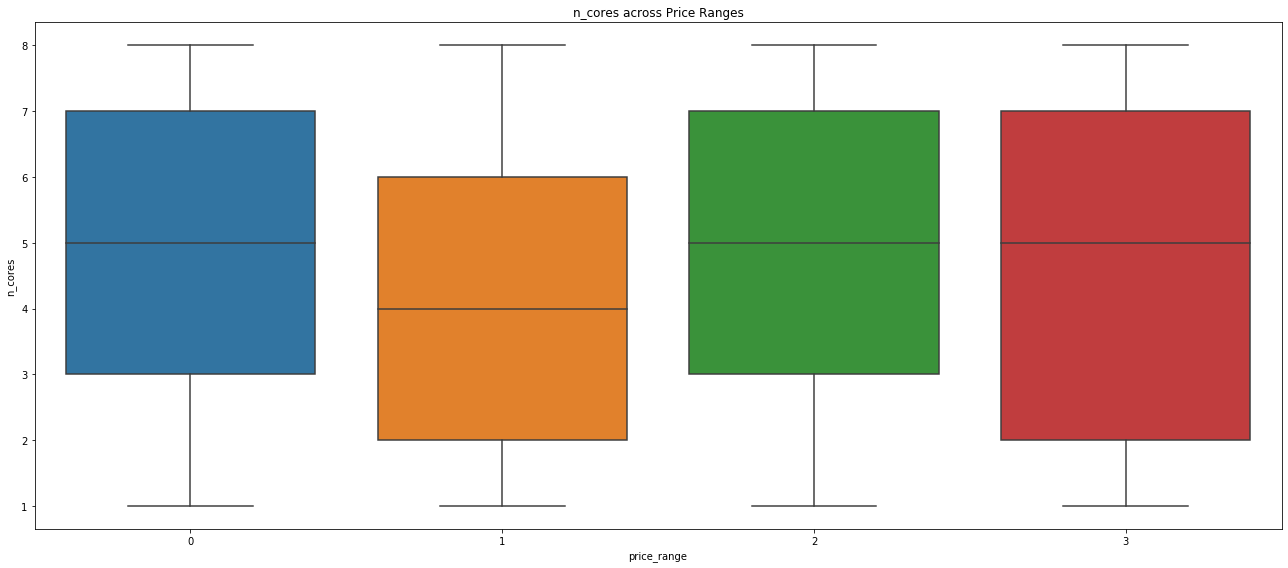

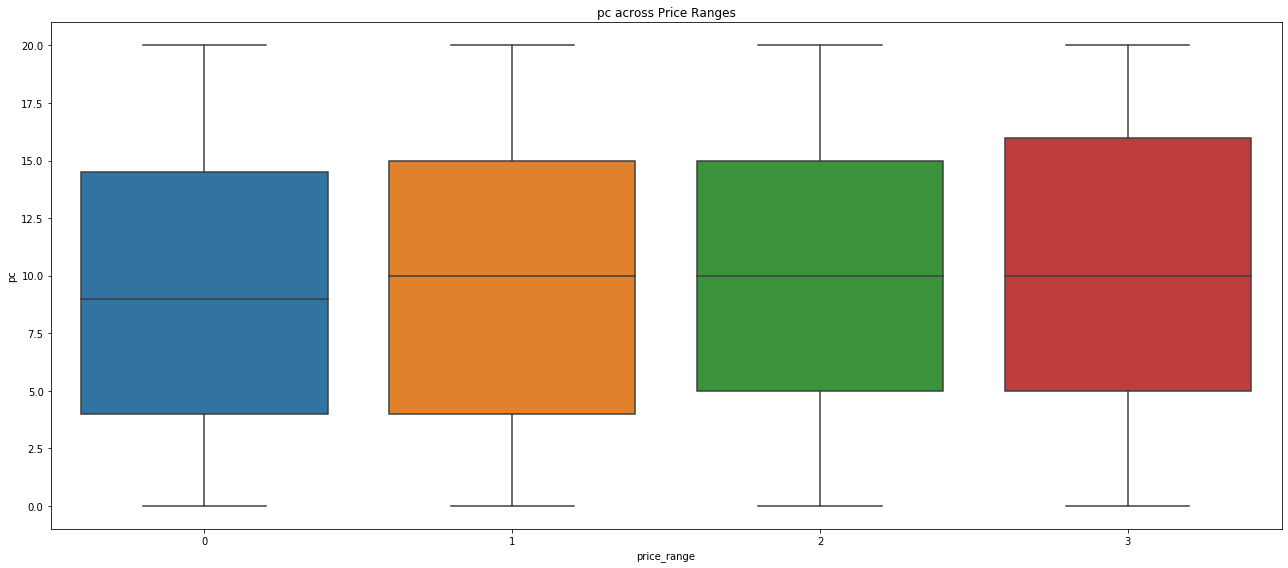

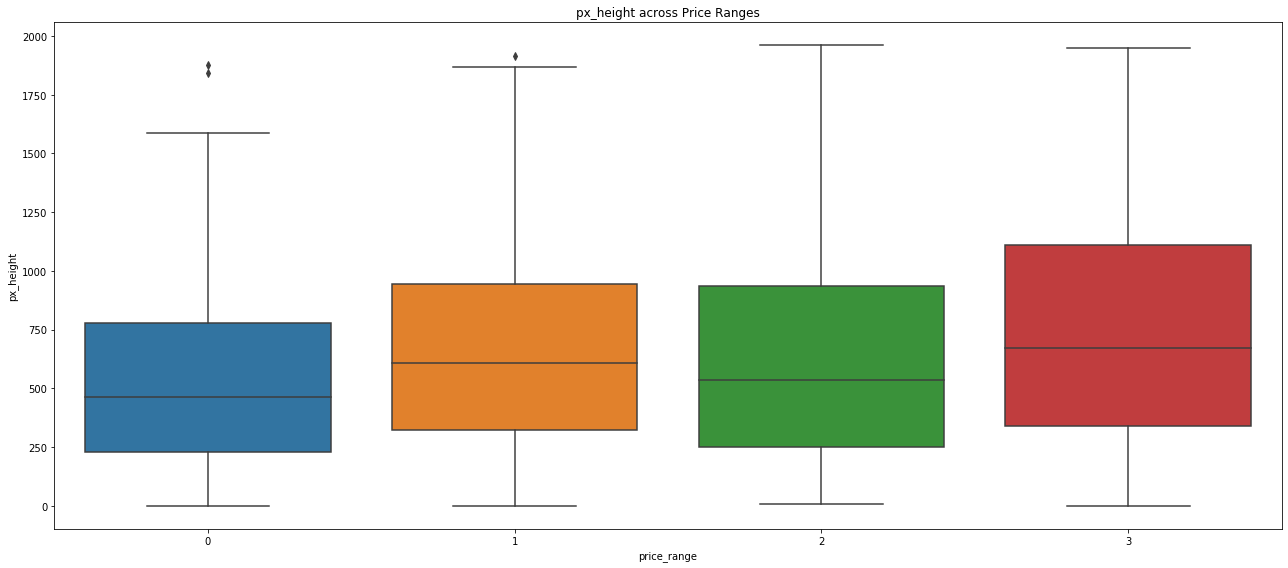

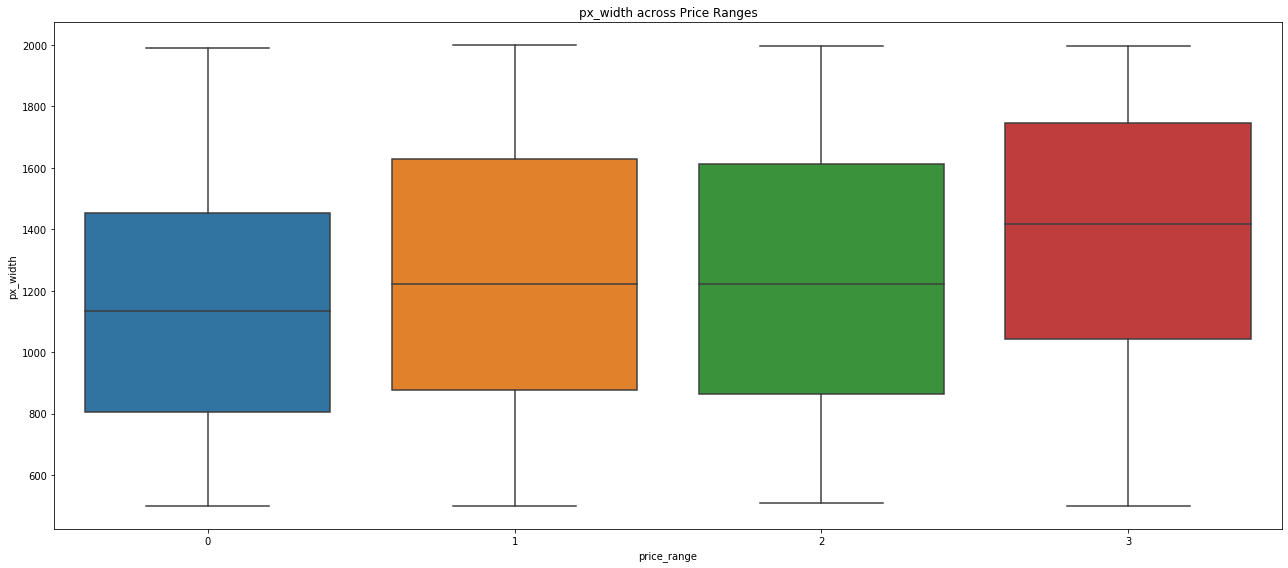

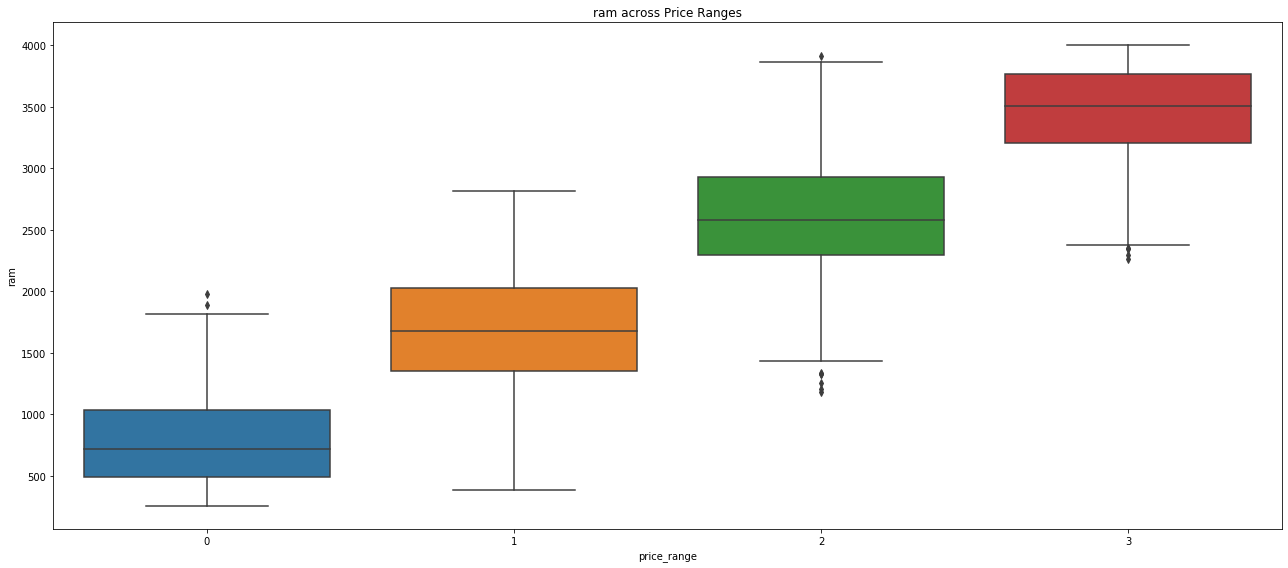

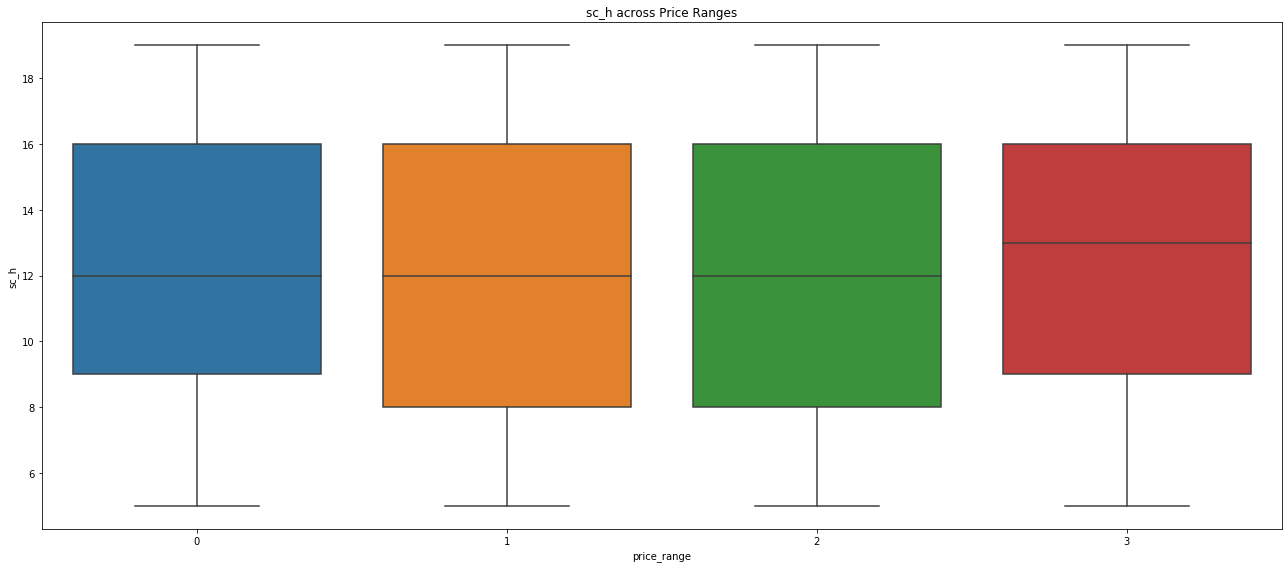

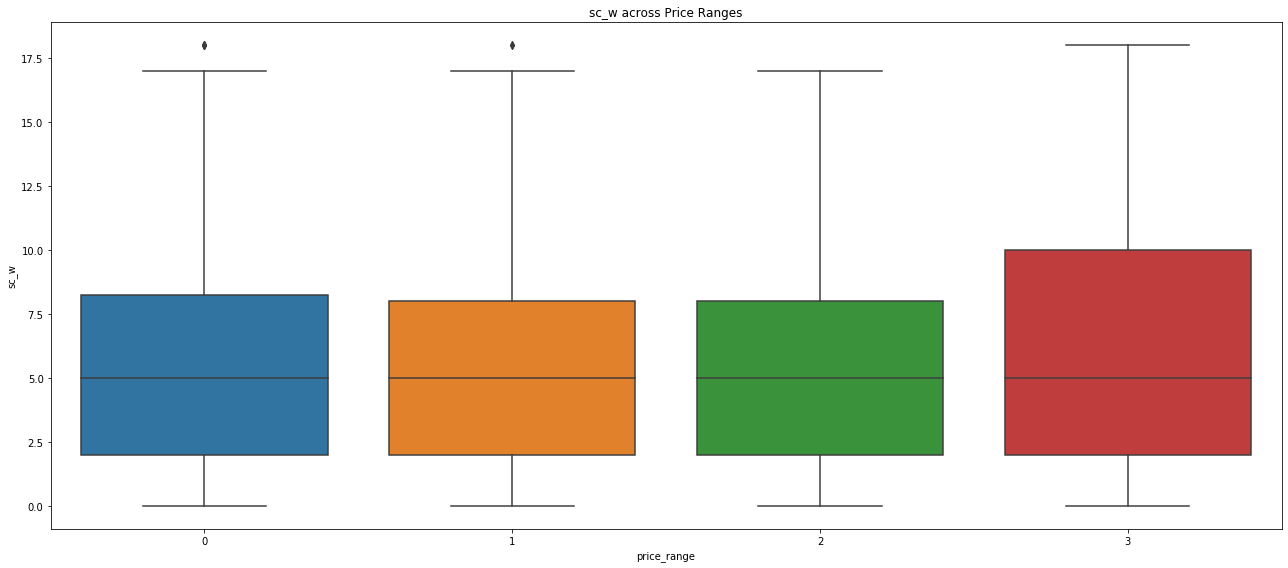

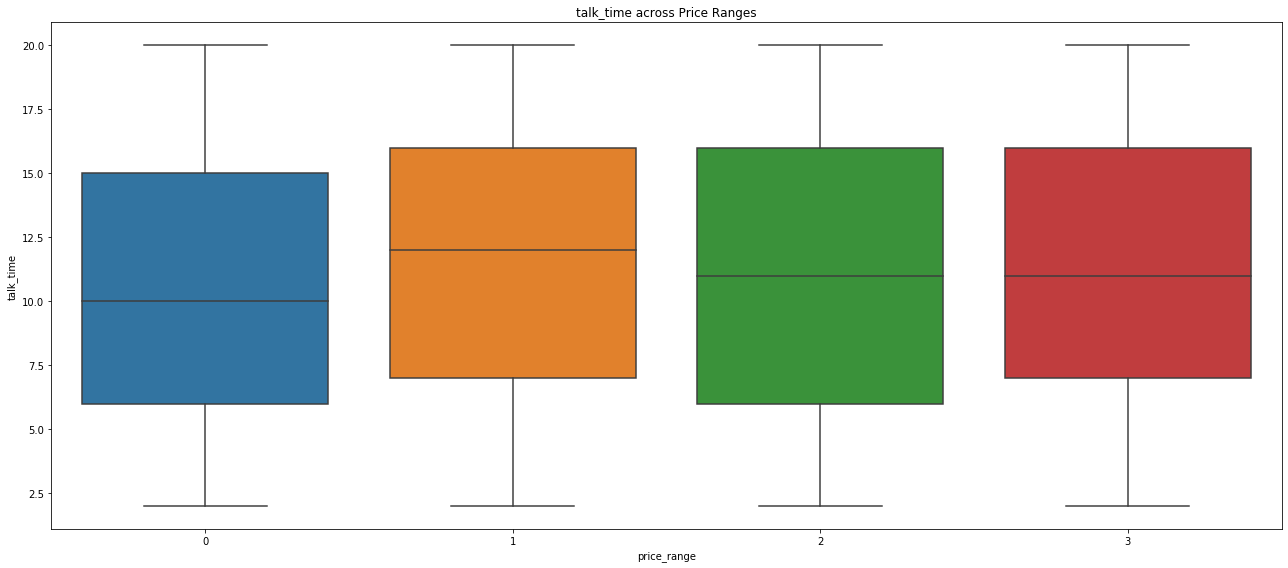

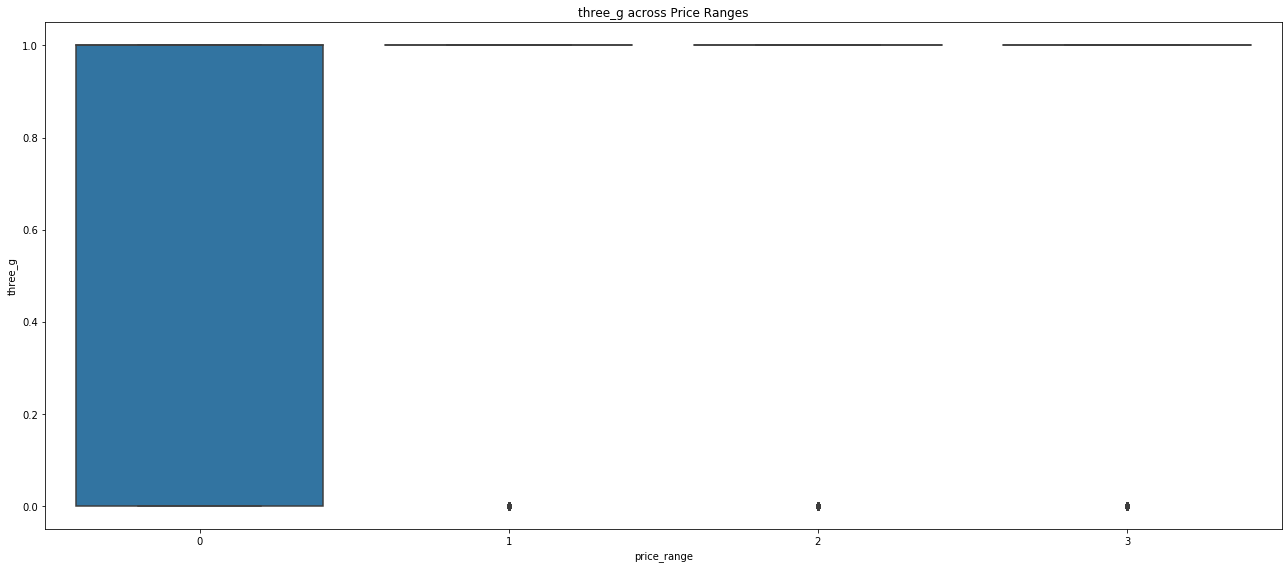

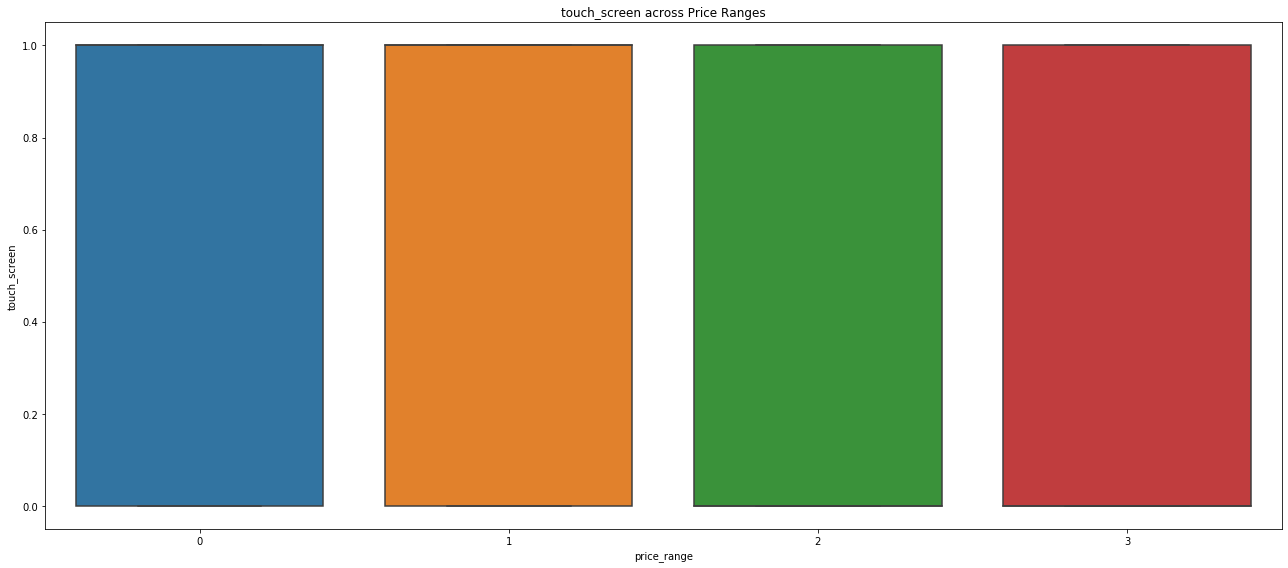

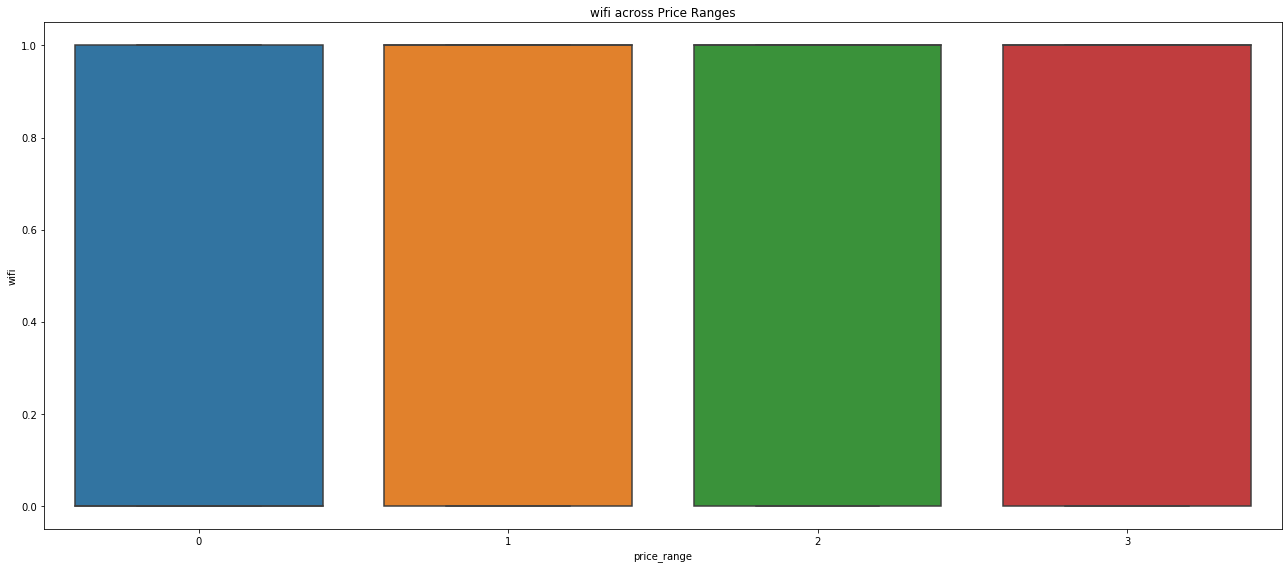

In [18]:
for f in train_data.columns:
    if f == 'price_range':continue
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
    sns.boxplot(x='price_range', y=f, data=train_data, ax=axes)
    axes.set_title(f + ' across Price Ranges')
    plt.tight_layout()
    plt.show()

In [19]:
corr_matrix = train_data.corr()
range_corr = corr_matrix["price_range"].sort_values(ascending=False)
range_corr

price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

In [20]:
# Get Every column with most correlated one to it 
for x in range(correlations.shape[0]):
    correlations.iloc[x,x] = 0.0
correlations.abs().idxmax()

battery_power      price_range
blue                  px_width
clock_speed            three_g
dual_sim         battery_power
fc                          pc
four_g                 three_g
int_memory         price_range
m_dep            battery_power
mobile_wt                 sc_h
n_cores                   blue
pc                          fc
px_height             px_width
px_width             px_height
ram                price_range
sc_h                      sc_w
sc_w                      sc_h
talk_time        battery_power
three_g                 four_g
touch_screen               ram
wifi                 px_height
price_range                ram
dtype: object

### Summary Insights:
* RAM is the most significant feature positively correlated with price_range.
* Battery power and screen resolution (px_width and px_height) also have notable positive correlations with price range, though not as strong as RAM.
* Features like internal memory, screen width/height, and camera resolutions show weak positive correlations, indicating minor influences on the price range.
* Some features like mobile weight and touch screen have weak negative correlations, suggesting a slight tendency for heavier phones and phones with touchscreens to be less expensive.
* Most features exhibit weak correlations, indicating they have minor or negligible direct influences on the price range.

It is clear that we can combine some features that are clearly related to each other, such as:
* sc_w <-> sc_h
* px_width <-> px_height
* pc <-> fc
* three_g <-> four_g

## Feature Engineering 

## Feature Selection

## Data Cleaning and Preprocessing

Since px_width and px_height are the only two features that can be combined and there is a good correlation between them and the target, we will test the correlation between their combination result and the target.

In [21]:
train_data_FE = train_data.copy()

In [22]:
train_data_FE['total_pxs'] = train_data_FE['px_height'] * train_data_FE['px_width']

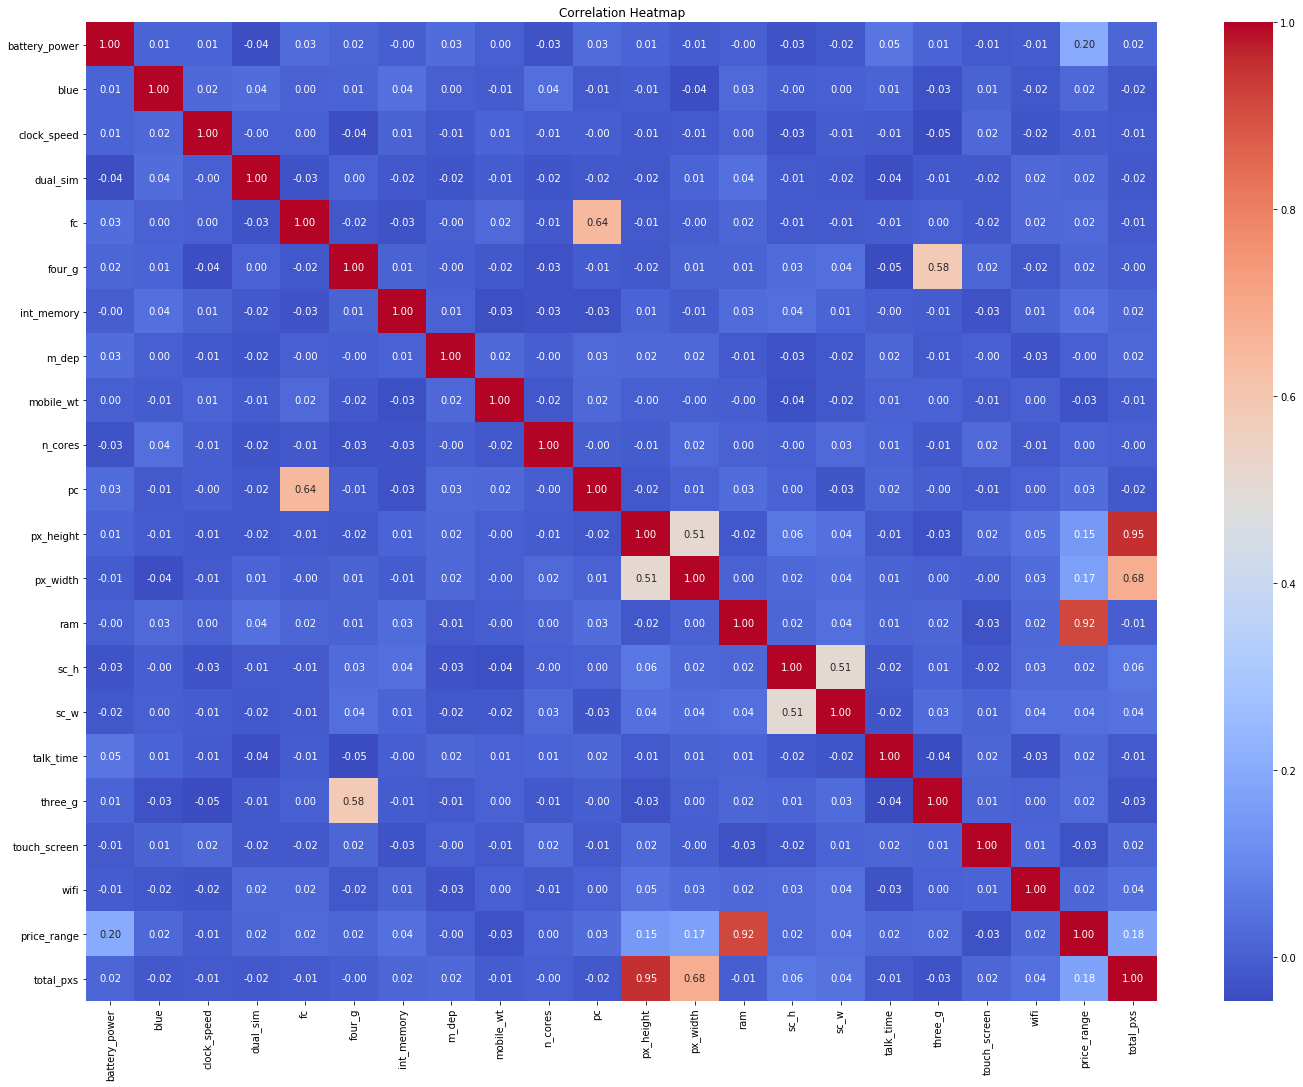

In [23]:
plt.figure(figsize=(24, 18))
sns.heatmap(train_data_FE.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
corr_matrix = train_data_FE.corr()
range_corr = corr_matrix["price_range"].sort_values(ascending=False)
range_corr

price_range      1.000000
ram              0.917119
battery_power    0.200723
total_pxs        0.175723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

`Combining px_width and px_height resulted in a slight improvement in the correlation with the target`

In [25]:
def save_object(obj, filename, path):
    filename = os.path.join(path, filename)
    with open(filename + ".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()

def load_object(filename, path):
    filename = os.path.join(path, filename)
    with open(filename + ".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [26]:
'''
    Remove all rows from 'train_data' that contain any missing values.
    The 'inplace=True' parameter modifies the DataFrame in place, meaning it will directly alter 'train_data' without needing to reassign it.
'''
train_data.dropna(inplace=True)

X = train_data.drop("price_range",axis=1)
y = train_data["price_range"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [27]:
median_vector = X_train.median()
median_vector = median_vector.tolist()
save_object(median_vector, 'median_vector', results_path)

In [28]:
X_train_1 = X_train.copy()
X_val_1 = X_val.copy()
sc_1 = StandardScaler()
X_train_1 = sc_1.fit_transform(X_train_1)
X_val_1 = sc_1.transform(X_val_1)

In [29]:
X_train_2 = X_train.copy()
X_val_2 = X_val.copy()
X_train_2['total_pxs'] = X_train_2['px_height'] * X_train_2['px_width']
X_val_2['total_pxs'] = X_val_2['px_height'] * X_val_2['px_width']
columns_to_keep = ['battery_power', 'total_pxs', 'ram']
columns_to_drop = [col for col in X_train_2.columns if col not in columns_to_keep]
X_train_2 = X_train_2.drop(columns=columns_to_drop)
sc_2 = StandardScaler()
X_val_2 = X_val_2.drop(columns=columns_to_drop)
X_train_2 = sc_2.fit_transform(X_train_2)
X_val_2 = sc_2.transform(X_val_2)

In [30]:
X_train_3 = X_train.copy()
X_val_3 = X_val.copy()
columns_to_keep = ['ram']
columns_to_drop = [col for col in X_train_3.columns if col not in columns_to_keep]
X_train_3 = X_train_3.drop(columns=columns_to_drop)
X_val_3 = X_val_3.drop(columns=columns_to_drop)
sc_3 = StandardScaler()
X_train_3 = sc_3.fit_transform(X_train_3)
X_val_3 = sc_3.transform(X_val_3)

## Modelling

In [31]:
def evaluate_model(model, x_val, y_val):
    y_preds = model.predict(x_val)
    print(classification_report(y_val,y_preds))
    cf = confusion_matrix(y_val,y_preds)
    disp = ConfusionMatrixDisplay(cf)
    disp.plot()
    plt.show()

In [32]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       113
           1       0.56      0.50      0.53       107
           2       0.47      0.68      0.56        84
           3       0.87      0.63      0.73        95

    accuracy                           0.65       399
   macro avg       0.67      0.65      0.65       399
weighted avg       0.67      0.65      0.65       399



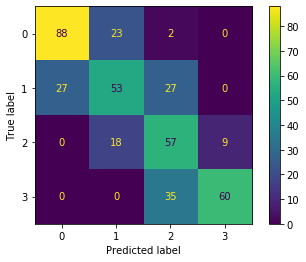

In [136]:
knn_1 = KNeighborsClassifier(n_neighbors=100)
train_model(knn_1, X_train_1, y_train, X_val_1, y_val)
evaluate_model(knn_1, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       113
           1       0.56      0.50      0.53       107
           2       0.47      0.68      0.56        84
           3       0.87      0.63      0.73        95

    accuracy                           0.65       399
   macro avg       0.67      0.65      0.65       399
weighted avg       0.67      0.65      0.65       399



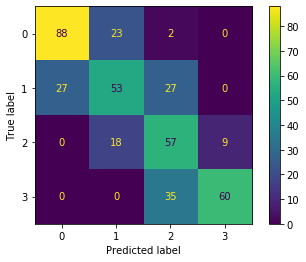

In [137]:
knn_2 = KNeighborsClassifier(n_neighbors=100)
train_model(knn_2, X_train_1, y_train, X_val_1, y_val)
evaluate_model(knn_2, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       113
           1       0.56      0.50      0.53       107
           2       0.47      0.68      0.56        84
           3       0.87      0.63      0.73        95

    accuracy                           0.65       399
   macro avg       0.67      0.65      0.65       399
weighted avg       0.67      0.65      0.65       399



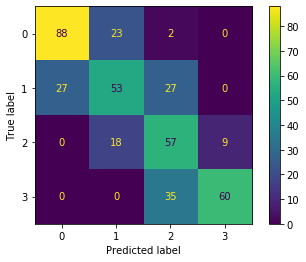

In [138]:
knn_3 = KNeighborsClassifier(n_neighbors=100)
train_model(knn_3, X_train_1, y_train, X_val_1, y_val)
evaluate_model(knn_3, X_val_1, y_val)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       113
           1       0.94      0.96      0.95       107
           2       0.94      0.93      0.93        84
           3       0.96      0.99      0.97        95

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



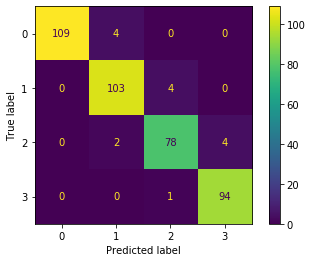

In [139]:
svc_1 = SVC(C=1.0,kernel = "linear",gamma=2.5)
train_model(svc_1, X_train_1, y_train, X_val_1, y_val)
evaluate_model(svc_1, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       113
           1       0.94      0.93      0.94       107
           2       0.87      0.88      0.88        84
           3       0.91      0.95      0.93        95

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399



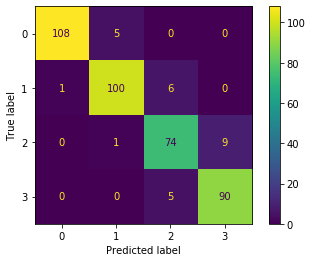

In [140]:
svc_2 = SVC(C=1.0,kernel = "linear",gamma=2.5)
train_model(svc_2, X_train_2, y_train, X_val_2, y_val)
evaluate_model(svc_2, X_val_2, y_val)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       113
           1       0.64      0.67      0.65       107
           2       0.57      0.64      0.61        84
           3       0.86      0.86      0.86        95

    accuracy                           0.74       399
   macro avg       0.75      0.74      0.74       399
weighted avg       0.76      0.74      0.75       399



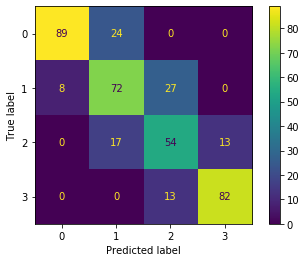

In [141]:
svc_3 = SVC(C=1.0,kernel = "linear",gamma=2.5)
train_model(svc_3, X_train_3, y_train, X_val_3, y_val)
evaluate_model(svc_3, X_val_3, y_val)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.96      0.96      0.96       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



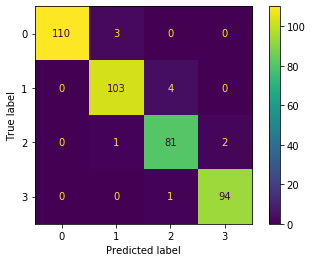

In [142]:
svc_1 = SVC(C=10, kernel='linear', gamma=0.5)
train_model(svc_1, X_train_1, y_train, X_val_1, y_val)
evaluate_model(svc_1, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.95      0.93      0.94       107
           2       0.86      0.89      0.88        84
           3       0.92      0.94      0.93        95

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.94      0.93      0.94       399



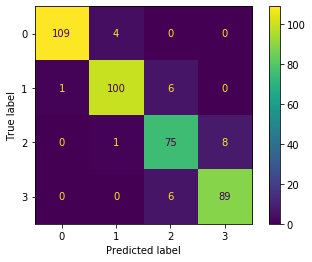

In [143]:
svc_2 = SVC(C=10, kernel='linear', gamma=0.5)
train_model(svc_2, X_train_2, y_train, X_val_2, y_val)
evaluate_model(svc_2, X_val_2, y_val)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       113
           1       0.63      0.67      0.65       107
           2       0.57      0.64      0.61        84
           3       0.87      0.86      0.87        95

    accuracy                           0.74       399
   macro avg       0.75      0.74      0.74       399
weighted avg       0.76      0.74      0.75       399



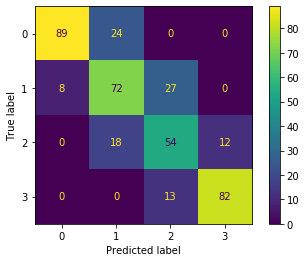

In [144]:
svc_3 = SVC(C=10, kernel='linear', gamma=0.5)
train_model(svc_3, X_train_3, y_train, X_val_3, y_val)
evaluate_model(svc_3, X_val_3, y_val)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       113
           1       0.73      0.69      0.71       107
           2       0.57      0.71      0.63        84
           3       0.89      0.82      0.85        95

    accuracy                           0.78       399
   macro avg       0.79      0.78      0.78       399
weighted avg       0.80      0.78      0.79       399



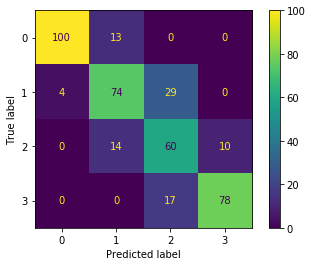

In [145]:
tree_clf_1=DecisionTreeClassifier(max_depth=5)
train_model(tree_clf_1, X_train_1, y_train, X_val_1, y_val)
evaluate_model(tree_clf_1, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       113
           1       0.76      0.75      0.75       107
           2       0.65      0.75      0.70        84
           3       0.93      0.87      0.90        95

    accuracy                           0.82       399
   macro avg       0.82      0.82      0.82       399
weighted avg       0.83      0.82      0.83       399



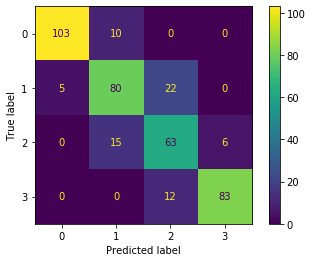

In [146]:
tree_clf_2=DecisionTreeClassifier(max_depth=5)
train_model(tree_clf_2, X_train_2, y_train, X_val_2, y_val)
evaluate_model(tree_clf_2, X_val_2, y_val)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       113
           1       0.64      0.75      0.69       107
           2       0.58      0.56      0.57        84
           3       0.85      0.86      0.85        95

    accuracy                           0.75       399
   macro avg       0.75      0.74      0.74       399
weighted avg       0.76      0.75      0.75       399



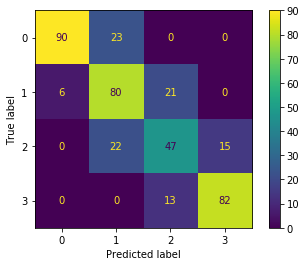

In [147]:
tree_clf_3=DecisionTreeClassifier(max_depth=5)
train_model(tree_clf_3, X_train_3, y_train, X_val_3, y_val)
evaluate_model(tree_clf_3, X_val_3, y_val)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       113
           1       0.76      0.79      0.77       107
           2       0.70      0.75      0.72        84
           3       0.95      0.91      0.92        95

    accuracy                           0.84       399
   macro avg       0.84      0.84      0.84       399
weighted avg       0.85      0.84      0.84       399



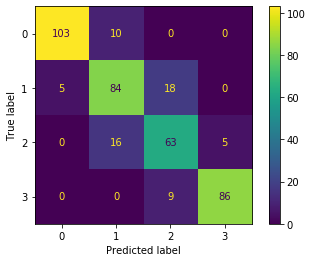

In [148]:
forest_clf_1 = RandomForestClassifier(max_depth=8, n_estimators=100)
train_model(forest_clf_1, X_train_1, y_train, X_val_1, y_val)
evaluate_model(forest_clf_1, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       113
           1       0.88      0.91      0.89       107
           2       0.81      0.83      0.82        84
           3       0.91      0.93      0.92        95

    accuracy                           0.90       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.90      0.90      0.90       399



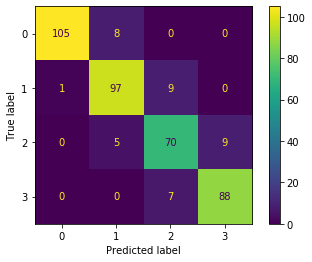

In [149]:
forest_clf_2 = RandomForestClassifier(max_depth=8, n_estimators=100)
train_model(forest_clf_2, X_train_2, y_train, X_val_2, y_val)
evaluate_model(forest_clf_2, X_val_2, y_val)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       113
           1       0.62      0.61      0.62       107
           2       0.56      0.58      0.57        84
           3       0.85      0.85      0.85        95

    accuracy                           0.73       399
   macro avg       0.72      0.72      0.72       399
weighted avg       0.73      0.73      0.73       399



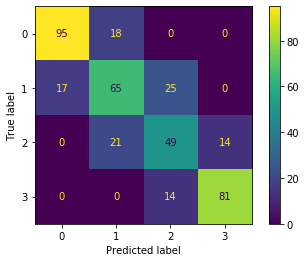

In [150]:
forest_clf_3 = RandomForestClassifier(max_depth=8, n_estimators=100)
train_model(forest_clf_3, X_train_3, y_train, X_val_3, y_val)
evaluate_model(forest_clf_3, X_val_3, y_val)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       113
           1       0.79      0.62      0.69       107
           2       0.59      0.68      0.63        84
           3       0.91      0.98      0.94        95

    accuracy                           0.82       399
   macro avg       0.81      0.82      0.81       399
weighted avg       0.83      0.82      0.82       399



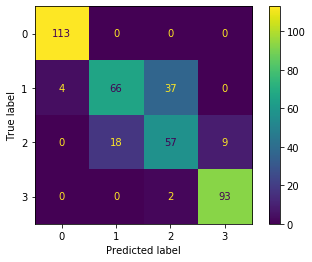

In [151]:
log_clf_1 = LogisticRegression(solver='liblinear')
train_model(log_clf_1, X_train_1, y_train, X_val_1, y_val)
evaluate_model(log_clf_1, X_val_1, y_val)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       113
           1       0.78      0.58      0.67       107
           2       0.55      0.61      0.58        84
           3       0.85      0.98      0.91        95

    accuracy                           0.80       399
   macro avg       0.79      0.79      0.78       399
weighted avg       0.80      0.80      0.79       399



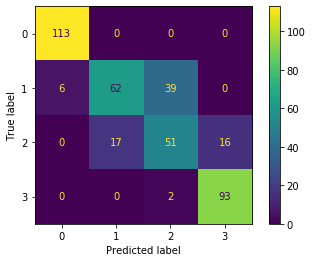

In [152]:
log_clf_2 = LogisticRegression(solver='liblinear')
train_model(log_clf_2, X_train_2, y_train, X_val_2, y_val)
evaluate_model(log_clf_2, X_val_2, y_val)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       113
           1       0.70      0.50      0.58       107
           2       0.51      0.54      0.52        84
           3       0.76      0.92      0.83        95

    accuracy                           0.71       399
   macro avg       0.70      0.71      0.70       399
weighted avg       0.71      0.71      0.70       399



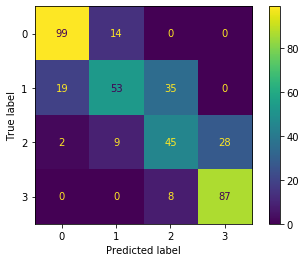

In [153]:
log_clf_3 = LogisticRegression(solver='liblinear')
train_model(log_clf_3, X_train_3, y_train, X_val_3, y_val)
evaluate_model(log_clf_3, X_val_3, y_val)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
grid_params = {
    'C': np.logspace(1.7, 2, 10),
    'kernel': ['linear'],  # Changed 'polynomial' to 'poly'
    'gamma': np.logspace(1.9, 2, 10),
    'degree': [2,3, 4],  # Specify the degree for the polynomial kernel
    "probability": [True]
}
grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3,n_jobs=-1)
grid_clf.fit(X_train_1, y_train)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'C': 58.434141337351754, 'degree': 2, 'gamma': 79.43282347242814, 'kernel': 'linear', 'probability': True}
0.955617157727325
CPU times: user 11.1 s, sys: 1.62 s, total: 12.8 s
Wall time: 12min 45s


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.97      0.96      0.97       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.98      0.97      0.98       399



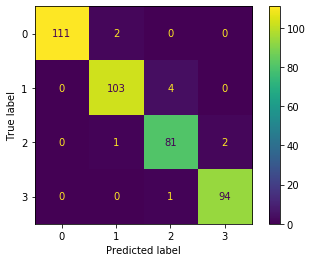

In [36]:
evaluate_model(grid_clf.best_estimator_, X_val_1, y_val)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
grid_params = {
    'C': np.logspace(1.7, 2, 10),
    'gamma': np.logspace(1.9, 2, 10),
    'degree': [2,3, 4] # Specify the degree for the polynomial kernel
}
grid_clf_f = GridSearchCV(SVC(probability=True,kernel="linear"), grid_params, cv = 3, scoring='accuracy',verbose=3,n_jobs=-1)
grid_clf_f.fit(X_train_1, y_train)
print(grid_clf_f.best_params_)
print(grid_clf_f.best_score_)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'C': 92.61187281287937, 'degree': 2, 'gamma': 79.43282347242814}
0.9512452773620216
CPU times: user 11.6 s, sys: 1.91 s, total: 13.5 s
Wall time: 13min 21s


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.97      0.96      0.97       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.98      0.97      0.98       399



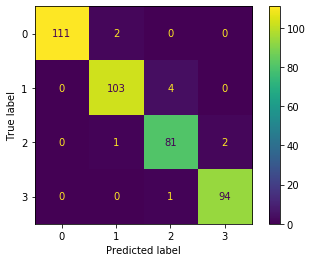

In [35]:
evaluate_model(grid_clf.best_estimator_, X_val_1, y_val)

## Infrence
Building a final model

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       113
           1       0.96      0.96      0.96       107
           2       0.94      0.96      0.95        84
           3       0.98      0.99      0.98        95

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



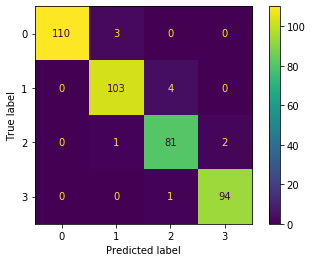

In [53]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ('std_scaler', StandardScaler()),
 ('Model' , SVC(C=10, kernel='linear', gamma=0.5)),
])

pipeline.fit(X_train, y_train)
evaluate_model(pipeline, X_val, y_val)

In [55]:
X_test = test_data.drop("id",axis=1)
X_test = X_test[list(X.columns)]

y_test_preds = pipeline.predict(X_test)
test_data["price_range"] = y_test_preds
test_data.sample(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
336,337,1877,1,0.5,0,4,0,10,0.9,123,...,134,610,3969,6,0,7,0,0,1,3
523,524,1970,0,2.9,0,3,1,9,0.2,163,...,110,1454,768,13,2,16,1,0,0,0
26,27,1858,0,3.0,1,0,0,17,0.6,124,...,575,1200,2427,16,11,13,1,1,0,2
118,119,1319,0,1.3,1,10,0,5,0.1,140,...,366,1821,3502,14,6,3,1,0,0,3
511,512,1391,0,1.5,1,6,1,39,0.9,88,...,491,1737,2367,18,11,12,1,1,0,2
434,435,1472,0,0.5,0,3,1,53,0.7,103,...,438,690,2001,14,0,14,1,1,1,1
875,876,1252,1,2.6,1,1,1,43,0.8,124,...,153,538,2447,18,15,11,1,0,0,1
776,777,1555,0,0.5,1,8,1,2,0.9,90,...,57,516,3596,11,6,6,1,1,1,3
466,467,1988,0,2.5,0,7,1,63,0.6,153,...,615,937,2276,13,7,11,1,0,0,2
390,391,1679,1,1.5,0,2,1,4,0.1,133,...,349,531,1557,16,15,12,1,0,1,1


In [56]:
save_object(pipeline, 'pipeline', results_path)